<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#&quot;Predict-Future-Sales&quot;" data-toc-modified-id="&quot;Predict-Future-Sales&quot;-1">"Predict Future Sales"</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1.0.0.1">Description</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-1.0.0.2">Evaluation</a></span></li></ul></li></ul></li><li><span><a href="#0-Preliminaries" data-toc-modified-id="0-Preliminaries-1.1">0 Preliminaries</a></span><ul class="toc-item"><li><span><a href="#0.0-Importing-Packages-and-Modules" data-toc-modified-id="0.0-Importing-Packages-and-Modules-1.1.1">0.0 Importing Packages and Modules</a></span></li><li><span><a href="#0.1-Importing-the-datasets" data-toc-modified-id="0.1-Importing-the-datasets-1.1.2">0.1 Importing the datasets</a></span></li></ul></li><li><span><a href="#1-Overview" data-toc-modified-id="1-Overview-1.2">1 Overview</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Size" data-toc-modified-id="Size-1.2.0.1">Size</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.2.0.2">Conclusions</a></span></li><li><span><a href="#Column-names-and-primary-keys" data-toc-modified-id="Column-names-and-primary-keys-1.2.0.3">Column names and primary keys</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-1.2.0.4">Missing values</a></span></li></ul></li></ul></li><li><span><a href="#2-Merging-and-aggregations" data-toc-modified-id="2-Merging-and-aggregations-1.3">2 Merging and aggregations</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Items-and-item-categories" data-toc-modified-id="Items-and-item-categories-1.3.0.1">Items and item categories</a></span></li><li><span><a href="#Shops-names-and-categories-into-the-training-set" data-toc-modified-id="Shops-names-and-categories-into-the-training-set-1.3.0.2">Shops names and categories into the training set</a></span></li><li><span><a href="#Add-numerical-values-for-dates" data-toc-modified-id="Add-numerical-values-for-dates-1.3.0.3">Add numerical values for dates</a></span></li></ul></li></ul></li><li><span><a href="#3-Exploring-the-data" data-toc-modified-id="3-Exploring-the-data-1.4">3 Exploring the data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-1.4.0.1">Categorical data</a></span></li><li><span><a href="#Quantitative-data" data-toc-modified-id="Quantitative-data-1.4.0.2">Quantitative data</a></span></li><li><span><a href="#Effect-of-day-of-week-on-sales" data-toc-modified-id="Effect-of-day-of-week-on-sales-1.4.0.3">Effect of day of week on sales</a></span></li><li><span><a href="#Effect-of-month-of-the-year-on-sales" data-toc-modified-id="Effect-of-month-of-the-year-on-sales-1.4.0.4">Effect of month of the year on sales</a></span></li><li><span><a href="#Linear-regression-on-the-sales" data-toc-modified-id="Linear-regression-on-the-sales-1.4.0.5">Linear regression on the sales</a></span></li><li><span><a href="#Statistical-test-on-stationarity" data-toc-modified-id="Statistical-test-on-stationarity-1.4.0.6">Statistical test on stationarity</a></span></li><li><span><a href="#Comparison-of-distributions-of-sales-depending-on-categories" data-toc-modified-id="Comparison-of-distributions-of-sales-depending-on-categories-1.4.0.7">Comparison of distributions of sales depending on categories</a></span></li><li><span><a href="#Tendancy/cycle-decomposition-(Hodrick-Prescott-filter)" data-toc-modified-id="Tendancy/cycle-decomposition-(Hodrick-Prescott-filter)-1.4.0.8">Tendancy/cycle decomposition (Hodrick-Prescott filter)</a></span></li></ul></li></ul></li><li><span><a href="#4-Predictions" data-toc-modified-id="4-Predictions-1.5">4 Predictions</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Vérification-des-ids-des-groupes-train-et-test" data-toc-modified-id="Vérification-des-ids-des-groupes-train-et-test-1.5.0.1">Vérification des ids des groupes train et test</a></span></li><li><span><a href="#Feature--ideas" data-toc-modified-id="Feature--ideas-1.5.0.2">Feature  ideas</a></span></li></ul></li></ul></li></ul></li></ul></div>

# "Predict Future Sales"

**Kaggle Competition and Final project for "How to win a data science competition" Coursera course"**

_Getting to know the database_


#### Description

This challenge serves as final project for the "How to win a data science competition" Coursera course.

In this competition you will work with a challenging time-series dataset consisting of daily sales data, kindly provided by one of the largest Russian software firms - 1C Company. 

We are asking you to predict total sales for every product and store in the next month. By solving this competition you will be able to apply and enhance your data science skills.

#### Evaluation

Submissions are evaluated by root mean squared error (RMSE). True target values are clipped into [0,20] range.

Submission File : For each id in the test set, you must predict a total number of sales. The file should contain a header and have the following format:

ID,item_cnt_month
0,0.5
1,0.5
2,0.5
3,0.5
etc.

## 0 Preliminaries

### 0.0 Importing Packages and Modules

Installations and importations required in the virtual environment.

In [1]:
# import os
# # !pip install -r requirements.txt

In [2]:
# from K1_functions import *

Importation of modules and packages. 

In [3]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'

from K1_functions import *

Setting pandas display options.

In [4]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                  'display.max_colwidth': 100,
                  'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
    pd.set_option(k,v)

Saving requirements

In [5]:
# !pip freeze > requirements_merging.txt

### 0.1 Importing the datasets

In [6]:
import os
os.getcwd()

'C:\\Users\\Maryse\\Documents\\FORMATION\\OCR_DS\\K1_Pred_Fut_Sales'

In [7]:
path_data = os.path.abspath(os.path.join(os.getcwd(), 'DATA')) # '..',
path_data

'C:\\Users\\Maryse\\Documents\\FORMATION\\OCR_DS\\K1_Pred_Fut_Sales\\DATA'

In [8]:
# get the name of all the .csv files in the 'DATA' directory

li_files = []
for n_dir, _, n_files in os.walk(path_data):
    li_files = n_files
li_files = sorted(li_files)
print(li_files)

['item_categories.csv', 'items.csv', 'sales_train.csv', 'sample_submission.csv', 'shops.csv', 'test.csv']


In [9]:
li_key_names = [os.path.splitext(name)[0][:8] for name in li_files]
dict_df = {}

In [10]:
for k, n_file in zip(li_key_names, li_files):
    print(k,'---', n_file)
    dict_df[k] = pd.read_csv(path_data+'\\'+ n_file) # encoding = "ISO-8859-1"

item_cat --- item_categories.csv
items --- items.csv
sales_tr --- sales_train.csv
sample_s --- sample_submission.csv
shops --- shops.csv
test --- test.csv


In [11]:
dict_df.keys()

dict_keys(['item_cat', 'items', 'sales_tr', 'sample_s', 'shops', 'test'])

## 1 Overview

#### Size

In [12]:
dict_df['test']

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [13]:
# Have an overview of the content

for k, df in dict_df.items():
    display(f"{k}: {df.shape}")

'item_cat: (84, 2)'

'items: (22170, 3)'

'sales_tr: (2935849, 6)'

'sample_s: (214200, 2)'

'shops: (60, 2)'

'test: (214200, 3)'

#### Conclusions
- 5 useful databases on 6 ('sample_submission' is only there to give an example).
- Most of the data in 'sales_tr' and 'sample_s'.
- Table 'test' has 7.3% of the training data.
- 22k distinct items and 84 categories for a 2M database
- 'shops', 'items' and 'item_cat' will have to be merged

#### Column names and primary keys

In [14]:
print("COLUMNS NAMES")
for k, df in dict_df.items():
    print('*', k)
    li_cols = dict_df[k].columns
    print(li_cols)

COLUMNS NAMES
* item_cat
Index(['item_category_name', 'item_category_id'], dtype='object')
* items
Index(['item_name', 'item_id', 'item_category_id'], dtype='object')
* sales_tr
Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day'], dtype='object')
* sample_s
Index(['ID', 'item_cnt_month'], dtype='object')
* shops
Index(['shop_name', 'shop_id'], dtype='object')
* test
Index(['ID', 'shop_id', 'item_id'], dtype='object')


In [15]:
# check the primary ids in the columns of each table

for n_table, n_file in zip(li_key_names, li_files):
    print('--', n_file)
    print([col for col in dict_df[n_table].columns if dict_df[n_table][col].is_unique])

-- item_categories.csv
['item_category_name', 'item_category_id']
-- items.csv
['item_name', 'item_id']
-- sales_train.csv
[]
-- sample_submission.csv
['ID']
-- shops.csv
['shop_name', 'shop_id']
-- test.csv
['ID']


To merge :
- left:'items', right:'item_cat' on 'item_category_id', how: 'left join'
- left:'sales_tr', right:'items' on 'items_id', how: 'left join'
- left:'sales_tr', right:'shops' on 'shop_id', how: 'left join'
- left:'test', right:'items' on 'items_id', how: 'left join'
- left:'test', right:'shops' on 'shop_id', how: 'left join'

#### Missing values

In [16]:
# Have an overview of the missing values

df_missing = pd.DataFrame()
for n_df, df in dict_df.items():
    df_missing = pd.concat([df_missing,
                            missing_data(df)['Percent'].to_frame(name=n_df)],
                           axis=1)
df_missing

,item_cat,items,sales_tr,sample_s,shops,test
item_category_id,0.00,0.00,nan,nan,nan,nan
item_category_name,0.00,nan,nan,nan,nan,nan
item_id,nan,0.00,0.00,nan,nan,0.00
item_name,nan,0.00,nan,nan,nan,nan
item_cnt_day,nan,nan,0.00,nan,nan,nan
item_price,nan,nan,0.00,nan,nan,nan
shop_id,nan,nan,0.00,nan,0.00,0.00
date_block_num,nan,nan,0.00,nan,nan,nan
date,nan,nan,0.00,nan,nan,nan
item_cnt_month,nan,nan,nan,0.00,nan,nan


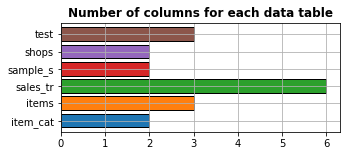

In [17]:
# plot the number of columns of each data table

colors = sns.color_palette('tab10')[:df_missing.shape[0]]
df_missing.count().plot.barh(ec='k', color=colors, width=0.8)
plt.title('Number of columns for each data table', fontweight='bold')
plt.gcf().set_size_inches(5,2)
plt.grid()

In [18]:
# rearrange the ratio of missing values in each columns

df_missing_pct = df_missing.T.stack().reset_index()
df_missing_pct.columns = ['data_table', 'column', 'missing_pct']
df_missing_pct.sample(3)

,data_table,column,missing_pct
17,test,ID,0.00
16,test,shop_id,0.00
6,sales_tr,item_cnt_day,0.00


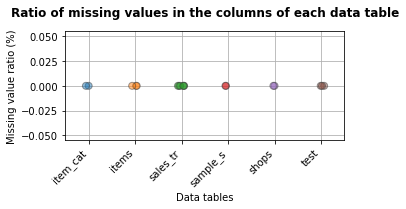

In [19]:
# visualize missing value ratios for columns of each table

sns.stripplot(x='data_table', y='missing_pct', data=df_missing_pct,
              linewidth=1, alpha = 0.5, size=7)
plt.gcf().set_size_inches(6,3)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.set_ylabel('Missing value ratio (%)')
ax.set_xlabel('Data tables')
ax.set_title('Ratio of missing values in the columns of each data table',
             fontweight='bold', pad=15)
plt.gcf().set_size_inches(5,2)
plt.grid()

## 2 Merging and aggregations

#### Items and item categories

In [20]:
# Check unicity

print(dict_df['items']['item_name'].value_counts().unique())
print(dict_df['items']['item_id'].value_counts().unique())

[1]
[1]


-> all items ('item_id' and 'item_name') are unique items.

In [21]:
# Merge items_cat into items

df_item = pd.merge(dict_df['item_cat'], dict_df['items'],
              on='item_category_id', how='left')
df_item

,item_category_name,item_category_id,item_name,item_id
0,PC - Гарнитуры/Наушники,0,PC: Гарнитура HyperX Cloud Core игровая стерео (KHX-HSCC-BK-BR),5441
1,PC - Гарнитуры/Наушники,0,Наушники PHILIPS SBC HC8680,16255
2,PC - Гарнитуры/Наушники,0,Наушники RITMIX RH-120,16256
3,PC - Гарнитуры/Наушники,0,Наушники RITMIX RH-124 Black,16257
4,Аксессуары - PS2,1,PS2: Карта памяти 8 Мб черная (Memory Card 8Mb - 102304: SCEE),5606
...,...,...,...,...
22165,Элементы питания,83,Элемент питания GP 15AU (LR6) - Блистер 2 шт Ultra,22095
22166,Элементы питания,83,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096
22167,Элементы питания,83,Элемент питания GP 24AU (LR03) - Блистер 2 шт Ultra,22097
22168,Элементы питания,83,Элемент питания КОСМОС LR03 2*BL,22098


#### Shops names and categories into the training set

In [22]:
# Merge 'shops' into 'sales_tr'

df_train = pd.merge(dict_df['sales_tr'], dict_df['shops'],
                    on='shop_id', how='left')

In [23]:
df_train.columns, df_item.columns

(Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day', 'shop_name'], dtype='object'),
 Index(['item_category_name', 'item_category_id', 'item_name', 'item_id'], dtype='object'))

In [24]:
# Merge 'df_item' into 'sales_tr'

df_train = pd.merge(df_train, df_item,
                    on='item_id', how='left')

In [25]:
df_train.sample(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_name,item_category_id,item_name
751237,23.08.2013,7,44,20081,349.00,1.00,"Самара ТЦ ""Мелодия""",Кино - DVD,40,УМОПОМРАЧИТЕЛЬНЫЕ ФАНТАЗИИ ЧАРЛИ СВУОНА ТРЕТЬЕГО. КИНО БЕЗ ГРАНИЦ
2659756,21.05.2015,28,41,9409,349.00,1.00,"РостовНаДону ТЦ ""Мега""",Подарки - Сувениры (в навеску),70,Брелок металлический WOT Танк Т-34-85
1233701,23.12.2013,11,35,21355,699.00,1.00,"Н.Новгород ТРЦ ""Фантастика""",Кино - Blu-Ray 3D,38,ХИЩНИК (3D BD+BD)


In [26]:
df_train.head(1)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_name,item_category_id,item_name
0,02.01.2013,0,59,22154,999.00,1.00,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)


In [27]:
df_train.tail(1)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_name,item_category_id,item_name
2935848,03.10.2015,33,25,7460,299.00,1.00,"Москва ТРК ""Атриум""",Музыка - CD локального производства,55,V/A The Golden Jazz Collection 1 2CD


#### Add numerical values for dates

In [28]:
# Parse dates to datetime64[ns]

df_train['date'] = pd.to_datetime(df_train['date'], format="%d.%m.%Y")

In [29]:
# Add a numerical column for dates

import matplotlib.dates as mpd

df_train.insert(1, 'date_num', mpd.date2num(df_train['date'])) 

## 3 Exploring the data

#### Categorical data

In [30]:
df_train.columns

Index(['date', 'date_num', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'shop_name', 'item_category_name', 'item_category_id', 'item_name'],
      dtype='object')

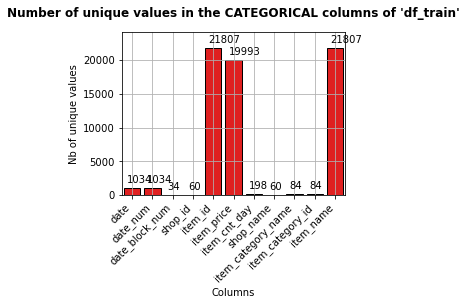

In [31]:
# number of unique values in each categorical column

plot_simple_barplot(x=df_train.columns, y=df_train.nunique(),
                    x_lab='Columns', y_lab='Nb of unique values',
                    title="Number of unique values in the CATEGORICAL columns of 'df_train'",
                    shorten_label=15, figsize=(4,3), color='red', annotate=True)

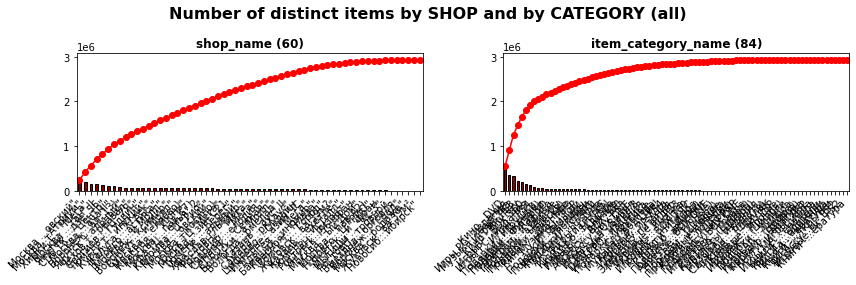

In [32]:
# explore the values of the categorical columns

cat_cols = ['shop_name', 'item_category_name']
plot_barplots(df_train, cat_cols, figsize=(12, 4), n_cols=2, n_col_limit=84,
              shorten_label=7, color='darkred', cum_plot=True,
              title="Number of distinct items by SHOP and by CATEGORY (all)")


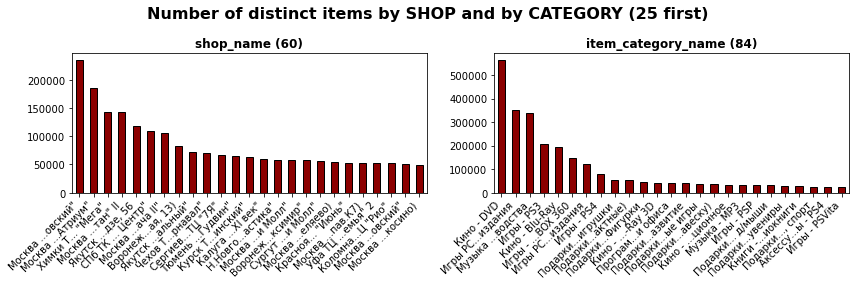

In [33]:
# explore the values of the categorical columns

cat_cols = ['shop_name', 'item_category_name']
plot_barplots(df_train, cat_cols, figsize=(12, 4), n_cols=2, n_col_limit=25,
              shorten_label=7, color='darkred', cum_plot=False,
              title="Number of distinct items by SHOP and by CATEGORY (25 first)")

#### Quantitative data

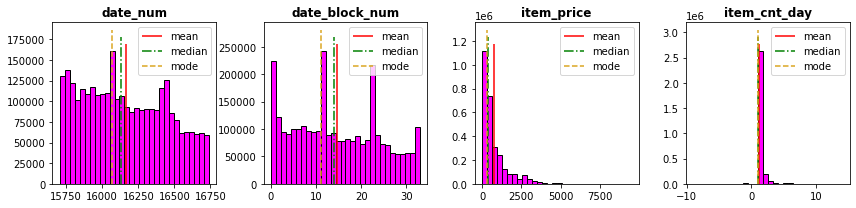

In [34]:
# histograms of the quantitative data

import numpy as np

quant_cols = df_train.select_dtypes(include=np.number).columns
quant_cols = [col for col in quant_cols if '_id' not in col]
plot_histograms(df_train, quant_cols, bins=30,
                figsize=(12, 3), color='magenta', skip_outliers=True,
                thresh=5, n_cols=4, tight_layout={'w_pad': 0.2,
                                                  'h_pad':0.65})

In [35]:
# Check the number of items sold per day

item_cnt_p_day = df_train['item_cnt_day'].value_counts().sort_index().to_frame().T
item_cnt_p_day

,-22.00,-16.00,-9.00,-6.00,-5.00,-4.00,-3.00,-2.00,-1.00,1.00,...,504.00,508.00,512.00,533.00,539.00,624.00,637.00,669.00,1000.00,2169.00
item_cnt_day,1,1,1,2,4,3,14,78,7252,2629372,...,1,1,1,1,1,1,1,1,1,1


----> Some items are returned (negative values)

In [36]:
# Check the number of items sold per day

item_cnt_p_day.T[item_cnt_p_day.max()>10].T

,-3.00,-2.00,-1.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,...,56.00,57.00,59.00,60.00,61.00,62.00,64.00,67.00,80.00,100.00
item_cnt_day,14,78,7252,2629372,194201,47350,19685,10474,6338,4057,...,12,12,13,14,18,14,13,12,12,13


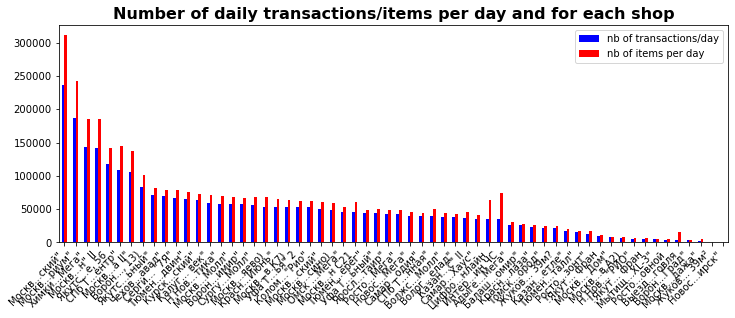

In [37]:
# table of the number of distinct items and total items sold per shop

# Histogramme du nombre de transactions par boutique
ser = df_train['shop_name'].value_counts()
# Pondération des histogrammes par le nombre des items
ser_weight = df_train[['shop_name', 'item_cnt_day']].groupby('shop_name').sum().iloc[:,0]

ser_both = pd.concat([ser, ser_weight], axis=1)
ser_both.plot.bar(color=['b', 'r'], figsize=(12,4))

ax = plt.gca()

thr = 5
lab_x = [item.get_text() for item in ax.get_xticklabels()]
short_lab_x = [s[:thr] + '...' + s[-thr:] if len(s) > 2*thr else s for s in lab_x]
ax.axes.set_xticklabels(short_lab_x)
ax.set_title("Number of daily transactions/items per day and for each shop",
             fontsize=16, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.legend(labels=['nb of transactions/day', 'nb of items per day'])

The number of transactions per day is not very different from this of items per day except for some shops.

Calculation of the main quantitative values per day to study (for all shops and categories)

In [173]:
# Tot nb of transactions, items, cash amount per day
ntrans_daily_ser = df_train.groupby(pd.Grouper(key='date', freq='D')).size()
nitems_daily_ser = df_train.groupby(pd.Grouper(key='date', freq='D'))['item_cnt_day'].sum()
_ser = (df_train['item_price']*df_train['item_cnt_day']).rename('amount')
_df = pd.concat([df_train['date'], _ser], axis=1)
amount_daily_ser = _df.groupby(pd.Grouper(key='date', freq='D'))['amount'].sum()

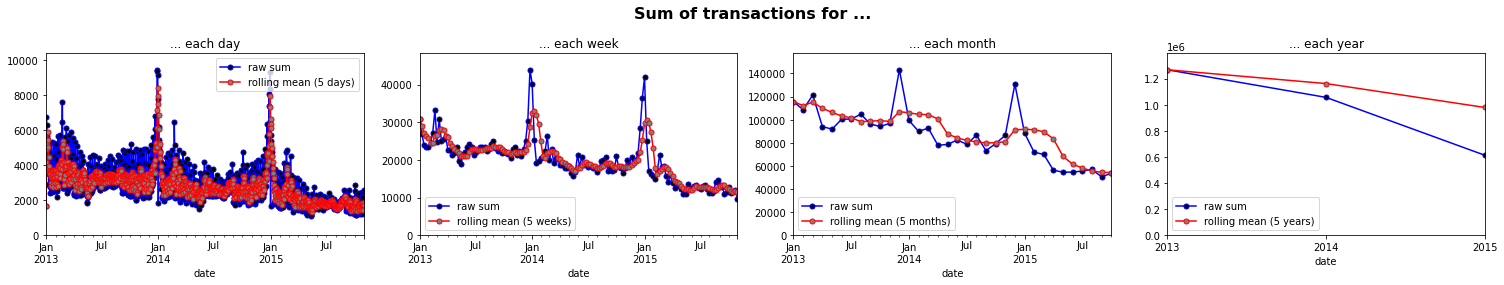

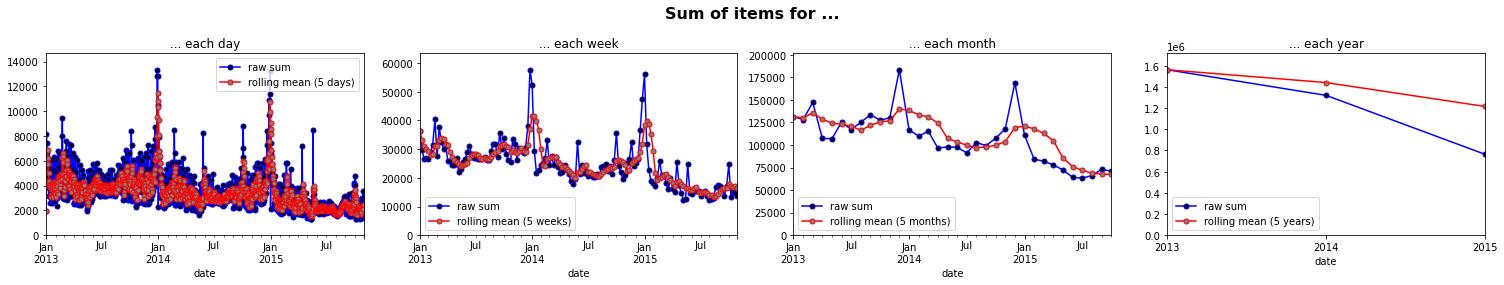

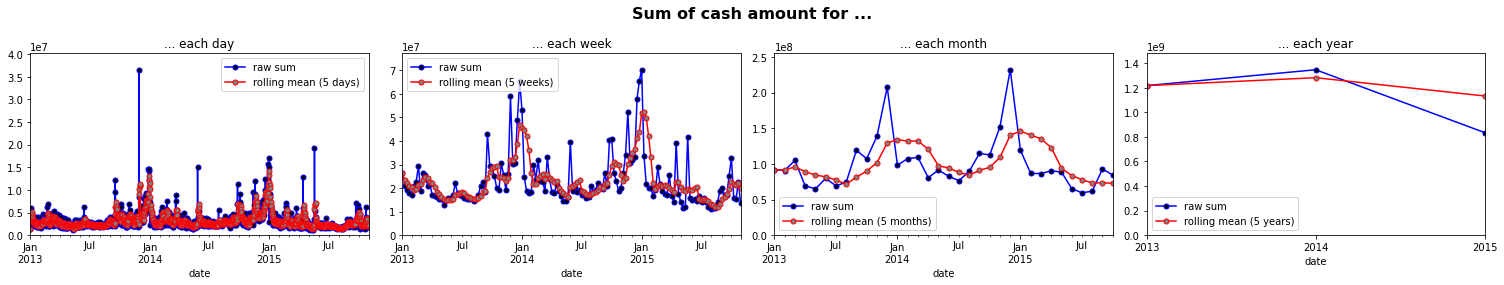

In [174]:
# Nb of total transactions, items, cash amount through time (day, week, month, year)

n_roll = 5
f_roll = lambda x: x.rolling(n_roll, min_periods=1).mean()
dict_time = {'D': 'day', 'W': 'week', 'M': 'month', 'Y': 'year'}
dict_ser = {'transactions': ntrans_daily_ser,
            'items': nitems_daily_ser,
            'cash amount': amount_daily_ser}

for name in ['transactions','items', 'cash amount']:

    fig, axs = plt.subplots(nrows=1, ncols=4)
    fig.set_size_inches(21,4)
    fig.subplots_adjust(wspace=0.2)
    
    for i,per in enumerate(['D', 'W', 'M', 'Y'],0):
        gb_ntrans_ser = dict_ser[name].resample(per).sum()
        gb_ntrans_ser.plot(ax=axs[i], c='b', ms=5, marker='o', mfc='k', ls='-')
        _roll = gb_ntrans_ser.to_frame().apply(f_roll).iloc[:,0]
        _roll.plot(ax=axs[i], c='r', ms=5, marker='o', mfc='grey', ls='-')
        axs[i].set(ylim=(0, max(gb_ntrans_ser) * 1.1))
        axs[i].set_title("... each " + dict_time[per])
        axs[i].legend(labels=['raw sum', f'rolling mean ({n_roll} {dict_time[per]}s)'])
    
    fig.suptitle(f'Sum of {name} for ...', fontsize = 16,  fontweight='bold')
    plt.tight_layout()

- We notice cycle effects (increase in sales for Christmas)
- Number of items and transactions are decreasing consistently through time (:2 in 3 years)
- The total cash amount is fairly stable through time -> more expansive items sold with time
- Effect for each day of the week to investigate

#### Effect of day of week on sales 

date
Monday       337074
Tuesday      345772
Wednesday    352962
Thursday     367280
Friday       439298
Saturday     590359
Sunday       503104
dtype: int64


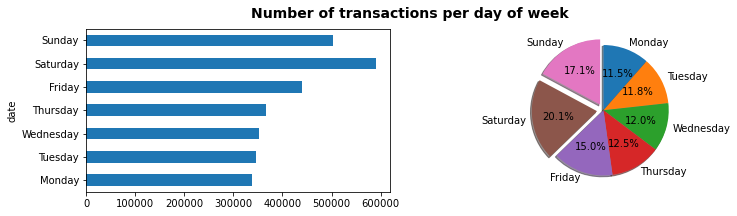

date
Monday      401487.00
Tuesday     454985.00
Wednesday   439714.00
Thursday    454623.00
Friday      553455.00
Saturday    734648.00
Sunday      609294.00
Name: item_cnt_day, dtype: float64


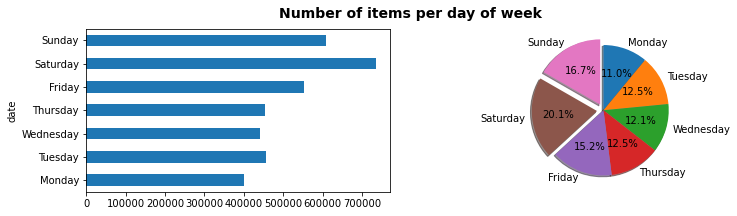

date
Monday      366401098.02
Tuesday     469872087.66
Wednesday   424094713.63
Thursday    428062669.28
Friday      550965178.42
Saturday    643667826.25
Sunday      515862771.31
Name: amount, dtype: float64


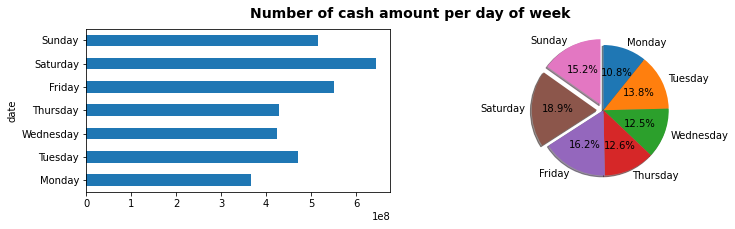

In [175]:
 import calendar

dict_ser = {'transactions': ntrans_daily_ser,
            'items': nitems_daily_ser,
            'cash amount': amount_daily_ser}

# volume des XXX par jour de la semaine
for name in ['transactions', 'items', 'cash amount']:
    
    vol_per_weekday = dict_ser[name].groupby(dict_ser['items'].index.day_name())\
                                        .sum().reindex(list(calendar.day_name))
    print(vol_per_weekday)

    fig = plt.figure(figsize=(12,3))

    ax1 = fig.add_subplot(1, 2, 1)
    vol_per_weekday.plot.barh(ax=ax1)

    ax2 = fig.add_subplot(1, 2, 2)
    vol_per_weekday.rename('').plot.pie(explode=(0,0,0,0,0,0.1,0.1),
                                        shadow=True, startangle=90, counterclock=False,
                                        autopct='%1.1f%%', ax=ax2)

    fig.suptitle(f"Number of {name} per day of week", fontsize=14, fontweight='bold')
    plt.show()

On achète en majorité le week-end et en particulier le samedi.

#### Effect of month of the year on sales

date
January     303561.00
February    270251.00
March       284057.00
April       228289.00
May         224836.00
June        237428.00
July        234857.00
August      248415.00
September   219882.00
October     227077.00
November    183164.00
December    274032.00
dtype: float64


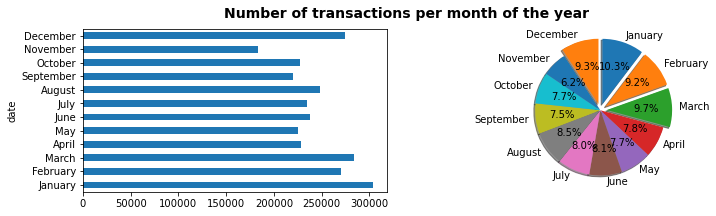

date
January     359349.00
February    321975.00
March       344453.00
April       281573.00
May         277055.00
June        286924.00
July        271433.00
August      294091.00
September   305383.00
October     306019.00
November    247854.00
December    352097.00
Name: item_cnt_day, dtype: float64


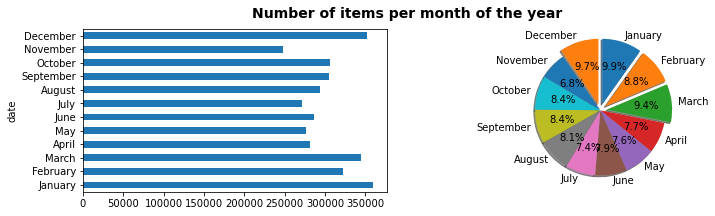

date
January     309100813.86
February    284690714.02
March       300524359.09
April       240058854.53
May         244924484.53
June        227616939.92
July        205244308.37
August      225651026.62
September   326710654.79
October     304104247.93
November    290703038.64
December    439596902.27
Name: amount, dtype: float64


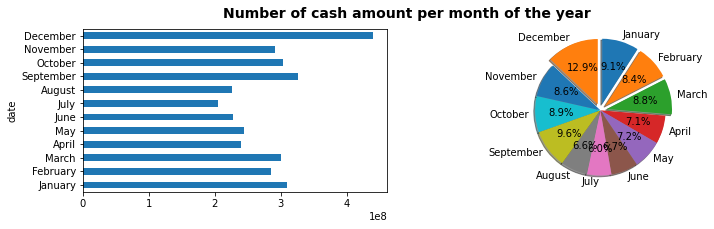

In [176]:
 import calendar

dict_ser = {'transactions': ntrans_daily_ser,
            'items': nitems_daily_ser,
            'cash amount': amount_daily_ser}

# volume des XXX par mois de l'année
for name in ['transactions', 'items', 'cash amount']:
    
    vol_per_monthofyear = dict_ser[name].groupby(dict_ser['items'].index.month_name())\
                                        .sum().reindex(list(calendar.month_name)).dropna()
    print(vol_per_monthofyear)

    fig = plt.figure(figsize=(12,3))

    ax1 = fig.add_subplot(1, 2, 1)
    vol_per_monthofyear.plot.barh(ax=ax1)

    ax2 = fig.add_subplot(1, 2, 2)
    vol_per_monthofyear.rename('').plot.pie(explode=(0.1,0.1,0.1,0,0,0,0,0,0,0,0,0.1),
                                            shadow=True, startangle=90, counterclock=False,
                                            autopct='%1.1f%%', ax=ax2)

    fig.suptitle(f"Number of {name} per month of the year", fontsize=14, fontweight='bold')
    plt.show()

#### Linear regression on the sales

In [177]:
# function that processes the linear regression from X and Y

from sklearn.linear_model import LinearRegression

def get_reg(X,Y):
  df = pd.DataFrame({'x': X, 'y': Y}).dropna(how='any')
  x_, y_  = [(df.loc[:,c]).values.reshape(-1,1) for c in df.columns]
  x__ = x_-x_[0]
  reg = LinearRegression().fit(x__,y_)
  return reg

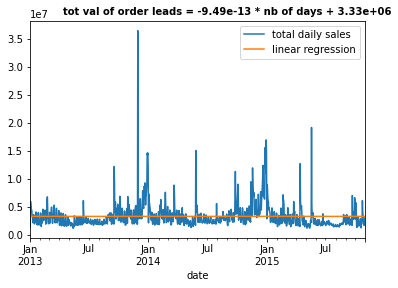

In [179]:
# Apply a regression on the number of transactions per day

reg = get_reg(amount_daily_ser.index, amount_daily_ser)
my_text = 'tot val of order leads = {:.2e} * nb of days + {:.2e}'.format(reg.coef_.ravel()[0],
                                                                         reg.intercept_.ravel()[0])
amount_daily_ser.plot()
amount_daily_ser_reg = amount_daily_ser.apply(lambda x: reg.coef_.ravel()[0] * x + reg.intercept_.ravel()[0])
amount_daily_ser_reg.plot()
plt.gcf().text(0.20, 0.9, my_text, color='black', fontweight='bold')
plt.legend(labels=['total daily sales', 'linear regression'])
plt.show()


#### Statistical test on stationarity

AUgmented Dickey-Fuller and Kwiatowski-Philips... test on raw values

In [180]:
from statsmodels.tsa.stattools import kpss

from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [181]:
kpss_test(amount_daily_ser)

Results of KPSS Test:
Test Statistic           0.25
p-value                  0.10
Lags Used               16.00
Critical Value (10%)     0.35
Critical Value (5%)      0.46
Critical Value (2.5%)    0.57
Critical Value (1%)      0.74
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


In [182]:
adf_test(amount_daily_ser)

Results of Dickey-Fuller Test:
Test Statistic                  -6.02
p-value                          0.00
#Lags Used                       8.00
Number of Observations Used   1025.00
Critical Value (1%)             -3.44
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


KPSS test :

Non-rejet de l'hypothèse nulle (stationnarité) : la série est stationnaire.

ADF test :

L'hypothèse nulle (non-stationnarité) est rejetée.
La série est stationnaire.

#### Comparison of distributions of sales depending on categories

In [ ]:
 # fonction plot_cat_histograms à réimplémenter :
    # prend en entrée une liste de catégories, splitte la dataframe en sous-dataframes,
    # trace des histogrammes superposés pour chaque catégorie

In [82]:
# liste des catégories
cats_li = list(df_train['item_category_name'].value_counts()\
                 .sort_values(ascending=False).index)

We create a dataset for sales by categories

In [97]:
df_train_categ = df_train.reset_index().set_index('date')\
        .assign(tot_trans= lambda x: x['item_cnt_day']*x['item_price'])\
        .groupby('item_category_id')\
        .agg(**{'tot_nb_items': ('item_cnt_day', np.sum),
            'list_items': ('item_id', list),
            'list_shops': ('shop_id', list),
            'list_dates': ('date_num', list),
            'list_amounts': ('tot_trans', list),
            'list_ind_trans': ('index', list),
            'tot_amount_trans_cat': ('tot_trans', np.sum),
            'mean_amoun_trans_cat': ('tot_trans', np.mean)})

In [98]:
df_train_categ.sample()

,tot_nb_items,list_items,list_shops,list_dates,list_amounts,list_ind_trans,tot_amount_trans_cat,mean_amoun_trans_cat
item_category_id,,,,,,,,
7,5358.00,"[8452, 7877, 7933, 7933, 8452, 8455, 8452, 8455, 7933, 7933, 8452, 7924, 7933, 7933, 8452, 7984,...","[4, 5, 5, 2, 2, 2, 3, 3, 3, 45, 45, 39, 39, 39, 39, 39, 46, 46, 46, 46, 34, 35, 35, 38, 38, 38, ...","[16343.0, 16342.0, 16340.0, 16343.0, 16343.0, 16343.0, 16339.0, 16340.0, 16339.0, 16339.0, 16343...","[2799.0, 4990.0, 1099.0, 1099.0, 2799.0, 3499.0, 8397.0, 3499.0, 1099.0, 2198.0, 2799.0, 1099.0,...","[1954364, 1955261, 1955429, 1955634, 1955635, 1955636, 1957218, 1957219, 1957228, 1958232, 19582...",14330481.59,3213.83


...and we add a column for amount_trans to the df_train dataset.

In [187]:
df_train = df_train.assign(amount_trans = lambda x: x['item_price']*x['item_cnt_day'] )

In [188]:
df_train.sample()

,date,date_num,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_name,item_category_id,item_name,amount_trans
2294888,2014-12-29,16433.00,23,26,5490,1449.00,2.00,"Москва ТЦ ""Ареал"" (Беляево)",Музыка - CD фирменного производства,56,PINK FLOYD The Endless River (фирм.),2898.00


Text(0.5, 1.0, 'Total number of transactions per category')

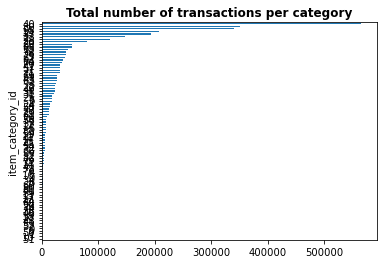

In [189]:
# Nombre total de transactions par catégories
nb_trans_cat_ser = df_train_categ['list_ind_trans'].apply(len).sort_values()
nb_trans_cat_ser.plot.barh()
plt.title("Total number of transactions per category", fontweight='bold')

In [190]:
# liste des 10 principales catégories en terme de nombre de transactions
n = 10
main_cat_li = nb_trans_cat_ser[-1-n:-1].index

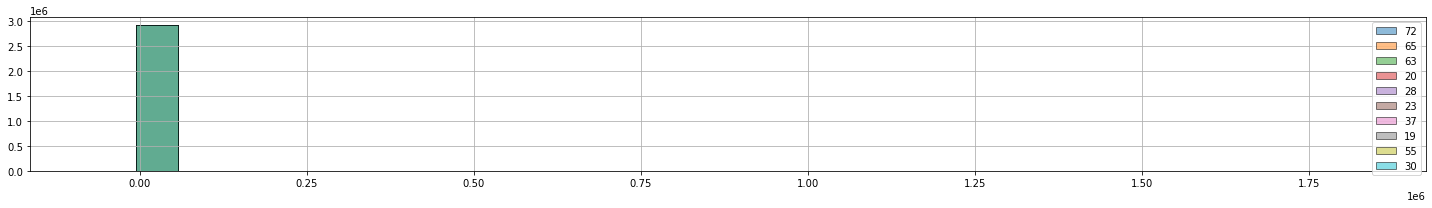

In [208]:
# Plot the histograms for the main categories

cats_li = main_cat_li
# cat_trans_ind_tup = tuple([pd.Index(df_train_categ['list_ind_trans'].loc[cat_id]) for cat_id in main_cat_li])
cat_trans_ind_tup = tuple([df_train_categ['list_ind_trans'].loc[cat_id] for cat_id in main_cat_li])

plot_cat_histograms(df=df_train[['amount_trans']],
                    ind_tuple=cat_trans_ind_tup,
                    col='amount_trans',
                    labels=tuple(main_cat_li),
                    # colors = ('green', 'red'),
                    bins=30, figwidth=20, n_cols=3,
                    tight_layout=True, 
                    skip_outliers=False,
                    filter_finite=False,
                    thresh=5, sh_tit=20)

In [207]:
""" """ """
Plotting histograms of specified quantitative continuous columns of a
dataframe in order to compare histograms of different categories.
"""

import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def plot_cat_histograms(df, ind_tuple, figwidth=8,
                        col = None, # colors,
                        skip_outliers=False, thresh=3, n_cols=1, bins=None ,tight_layout=True,
                        labels=None, sh_tit=13, filter_finite=True):

#     n_tot = len(cols)
#     n_rows = (n_tot // n_cols) + ((n_tot % n_cols) > 0) * 1
    figsize = (figwidth, 3)

#     # loop on each row
#     for j, row in enumerate(range(n_rows), 0):

    fig = plt.figure(figsize=figsize)
#     sub_cols = list(cols)[j*n_cols:(j+1)*n_cols]

#     for i, col in enumerate(sub_cols, 1):

#         ax = fig.add_subplot(1, 1, i)

    if col is not None:

#         mask_na = df[col].notna()
#         ser = df[col].loc[mask_na]
#         if filter_finite:
#             mask_isfin = np.isfinite(ser)
#             ser = ser.loc[mask_isfin]
#         if skip_outliers:
#             mask_outl = np.abs(st.zscore(ser)) < thresh
#             ser = ser.loc[mask_outl]

        ax = fig.add_subplot(1, 1, 1)

        for k in range(len(ind_tuple)):
            sub_df = df.loc[ind_tuple[k]]
            sns.hist
            df[col].hist(label=labels[k], alpha=0.5, ec='k', 
                         bins=30, ax=ax) # color='green', density=True

        plt.legend()

#         title = col if len(col) < 2 * sh_tit else col[:sh_tit] + '...' + col[-sh_tit:]
#         ax.set_title(title)
        ax.title.set_fontweight('bold')
        if tight_layout:
            plt.tight_layout()
            
    plt.show()

#### Tendancy/cycle decomposition (Hodrick-Prescott filter)


In [209]:
df_train.columns

Index(['date', 'date_num', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'shop_name', 'item_category_name', 'item_category_id', 'item_name', 'amount_trans'],
      dtype='object')

We create a dataframe for daily sales.

In [210]:
df_train_daily = df_train.set_index('date')\
        .assign(tot_trans= lambda x: x['item_cnt_day']*x['item_price'])\
        .groupby(pd.Grouper(freq='D'))\
        .agg(**{'tot_nb_items': ('item_cnt_day', np.sum),
            'list_items': ('item_id', list),
            'list_shops': ('shop_id', list),
            'list_cat': ('item_category_id', list),
            'tot_trans_day': ('tot_trans', np.sum)})

In [211]:
df_train_daily.sample()

,tot_nb_items,list_items,list_shops,list_cat,tot_trans_day
date,,,,,
2015-07-05,1912.00,"[6002, 6472, 5037, 8690, 9355, 6507, 2308, 3446, 3444, 4050, 4415, 4385, 3731, 3651, 17260, 1789...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4,...","[55, 28, 19, 55, 70, 28, 30, 23, 19, 24, 56, 30, 30, 55, 40, 37, 40, 37, 40, 40, 30, 40, 40, 40,...",1941065.29


Display evolution of daily amount (sales) through time for all shops, items and categories, and dissociate trend from cycle with Hodrick-Prescott filter

For daily data (from  quartely lambda = 1600) :
lambda(daily) = 1600*(365/4)^4 = 69 331 643

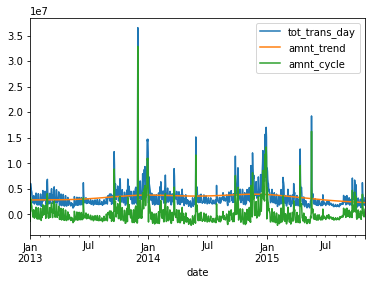

In [212]:
from statsmodels.tsa.filters.hp_filter import hpfilter

lambda_dayly = 69331643
# lambda_monthly = 129600
# lambda_quarterly = 1600
# lambda_yearly = 6.25
amnt_cycle, amnt_trend = hpfilter(df_train_daily['tot_trans_day'],
                                  lamb=lambda_dayly) # dayly data

df_train_daily['amnt_trend'] = amnt_trend
df_train_daily['amnt_cycle'] = amnt_cycle

df_train_daily.iloc[:,-3:].plot();

## 4 Predictions

Predict total sales for every product and store in the next month.

#### Vérification des ids des groupes train et test

In [ ]:
train = df_train[['shop_id', 'item_id', 'item_category_id']]

In [ ]:
test = dict_df['test'].set_index('ID').merge(dict_df['items'])

In [ ]:
# Articles présents seulement dans la table test
print("Articles présents seulement dans la table test :",
      len(list((set(test.item_id)-set(train.item_id)))))
# Articles présents seulement dans la table train
print("Articles présents seulement dans la table train :",
      len(list((set(train.item_id)-set(test.item_id)))))

In [ ]:
# Boutiques présentes seulement dans la table test
print("Boutiques présentes seulement dans la table test :",
      len(list((set(test.shop_id)-set(train.shop_id)))))
# Boutiques présentes  seulement dans la table train
print("Boutiques présentes seulement dans la table train :",
      len(list((set(train.shop_id)-set(test.shop_id)))))

In [ ]:
# Catégories présentes seulement dans la table test
print("Catégories présentes seulement dans la table test :",
      len(list((set(test.item_category_id)-set(train.item_category_id)))))
# Catégories présentes seulement dans la table train
print("Catégories présentes seulement dans la table train :",
      len(list((set(train.item_category_id)-set(test.item_category_id)))))

Conclusions :
- Il existe dans la base 'test' des articles qui ne sont pas dans la base 'train',
- ces articles ne sont pas nombreux (363/(363+17070) soit 2% environ)
- en revanche, les catégories et les boutiques de la base 'test' sont toutes dans la base 'train'

Il faudra tenir compte de cela dans le modèle qui sera utilisé.

#### Feature  ideas

- Number of week-end days in the month